In [1]:
#IMPORTO LIBRERIE
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, array_to_img
from keras.utils import np_utils
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
from keras import Input
from keras import Model
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
#IMPORTO DATASET → FASHION MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [4]:
#calcolo numero pixel
n_pixel = X_train.shape[1] * X_train.shape[2] #28*28=784

#trasformo il vettore
X_train = X_train.reshape(X_train.shape[0], n_pixel)
X_test = X_test.reshape(X_test.shape[0], n_pixel)

In [5]:
#DIVIDO IN 3 CANALI (vgg16 richiede immagini colorate (rgb))
X_train=np.dstack([X_train]*3)
X_test=np.dstack([X_test]*3)

In [6]:
#immagini dataset mnist 28*28
X_train = X_train.reshape(X_train.shape[0], 28,28,3)
X_test= X_test.reshape (X_test.shape[0],28,28,3)

In [7]:
#rimodello le immagini 48*48 x VGG16
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])

In [8]:
#normalizzo i valori (e traformo in float)
X_train = X_train / 255
X_test = X_test / 255
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [9]:
#codifica one hot encode
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# shape[1] lunghezza stringa=numero di classi (10)
n_classi = y_train.shape[1]

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49000, 48, 48, 3), (21000, 48, 48, 3), (49000, 10), (21000, 10))

In [11]:
#preprocessing input x vgg16
X_train = preprocess_input(X_train)
X_test =preprocess_input(X_test)

VGG16

In [12]:
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(48, 48, 3)
                 )
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [13]:
X_train= conv_base.predict(np.array(X_train), batch_size=16, verbose=1)
X_test= conv_base.predict(np.array(X_test), batch_size=16, verbose=1)

1313/1313 [==============================] - 456s 347ms/step


In [14]:
X_train.shape, X_test.shape

((49000, 1, 1, 512), (21000, 1, 1, 512))

In [15]:
X_train=np.reshape(X_train, (X_train.shape[0], 512))
X_test=np.reshape(X_test, (X_test.shape[0], 512))

In [16]:
model = Sequential()
#layer
model.add(Dense(500, input_dim=512, activation='relu')) #primo strato nascosto
model.add(Dense(10, activation='softmax'))#layer di output

model.summary()

#Compilo modello
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               256500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5010      
Total params: 261,510
Trainable params: 261,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
#progress=model.evaluate(X_test, y_test, batch_size=256)
progress=model.fit(X_train, y_train, validation_data=(X_test, y_test), validation_split=0.3, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
134/134 [==============================] - 2s 14ms/step - loss: 2.2636 - accuracy: 0.2671 - val_loss: 1.5207 - val_accuracy: 0.4723
Epoch 2/10
134/134 [==============================] - 1s 11ms/step - loss: 1.4048 - accuracy: 0.5574 - val_loss: 1.2268 - val_accuracy: 0.5961
Epoch 3/10
134/134 [==============================] - 2s 11ms/step - loss: 1.1738 - accuracy: 0.6244 - val_loss: 1.0740 - val_accuracy: 0.6435
Epoch 4/10
134/134 [==============================] - 2s 12ms/step - loss: 1.0632 - accuracy: 0.6486 - val_loss: 1.0140 - val_accuracy: 0.6630
Epoch 5/10
134/134 [==============================] - 2s 11ms/step - loss: 0.9799 - accuracy: 0.6772 - val_loss: 0.9373 - val_accuracy: 0.7015
Epoch 6/10
134/134 [==============================] - 2s 12ms/step - loss: 0.9167 - accuracy: 0.6936 - val_loss: 0.8898 - val_accuracy: 0.7185
Epoch 7/10
134/134 [==============================] - 2s 12ms/step - loss: 0.8784 - accuracy: 0.7097 - val_loss: 0.8729 - val_accuracy: 0.7084

Perdita accuratezza (accuracy)

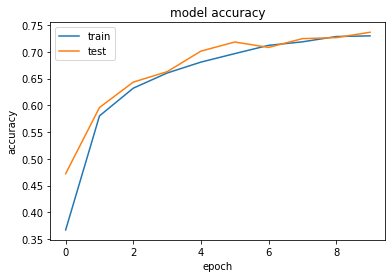

In [18]:
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perdita dell'errore (loss)

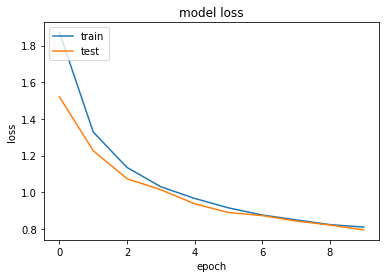

In [19]:
plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()